In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/CONSEGNA/Ispezione

/gdrive/My Drive/CONSEGNA/Ispezione


Import Libraries


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.7.0


Random Seed for reproducibility

In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

Dataset loading and inspection

In [ ]:
dataset = pd.read_csv('Training.csv')
print(dataset.shape)
dataset.head()

(68528, 7)


,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
0,7.97698,4.33494,10.67282,1.76692,3.22440,51.681460,3.65434
1,8.07824,4.44616,10.56160,1.70716,3.32566,51.563598,3.47672
2,8.02844,4.22372,10.56160,1.64906,3.17460,50.863080,3.47672
3,8.02844,4.22372,10.56160,1.70716,3.17460,45.841581,3.47672
4,7.87572,4.44616,10.45038,1.70716,3.27586,47.126421,3.47672


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68528 entries, 0 to 68527
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sponginess          68528 non-null  float64
 1   Wonder level        68528 non-null  float64
 2   Crunchiness         68528 non-null  float64
 3   Loudness on impact  68528 non-null  float64
 4   Meme creativity     68528 non-null  float64
 5   Soap slipperiness   68528 non-null  float64
 6   Hype root           68528 non-null  float64
dtypes: float64(7)
memory usage: 3.7 MB


In [13]:
#Let's check the correlation 
dataset.corr()
#Crunchiness and Hype root are 99% correlated!
#Wonder level and Loudness on impact are 93% correlated!

,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
Sponginess,1.000000,0.253002,0.297509,0.121744,0.331200,0.127885,0.183141
Wonder level,0.253002,1.000000,0.119078,0.930254,0.367438,0.237021,0.074392
Crunchiness,0.297509,0.119078,1.000000,0.067477,0.029108,0.061539,0.987209
Loudness on impact,0.121744,0.930254,0.067477,1.000000,0.056184,0.229336,0.048806
Meme creativity,0.331200,0.367438,0.029108,0.056184,1.000000,0.078168,-0.040596
Soap slipperiness,0.127885,0.237021,0.061539,0.229336,0.078168,1.000000,0.050996
Hype root,0.183141,0.074392,0.987209,0.048806,-0.040596,0.050996,1.000000


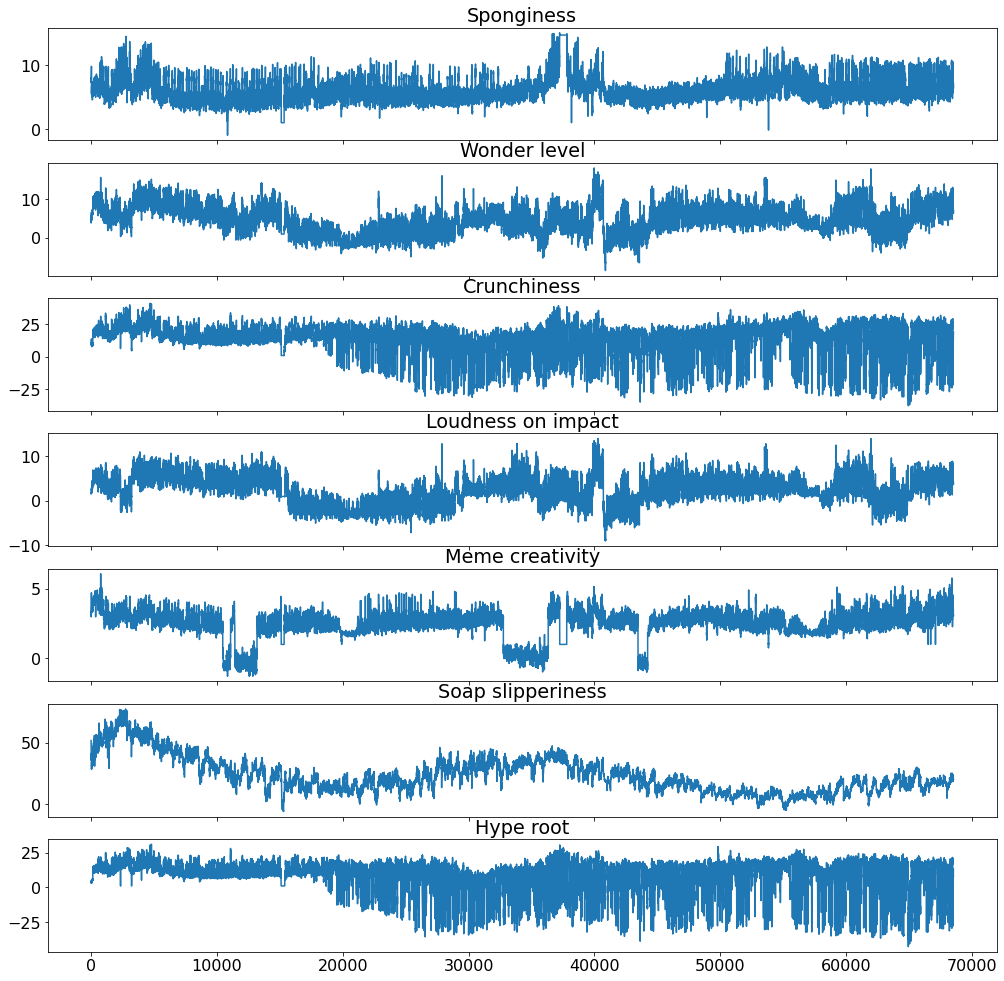

In [ ]:
#Dataframe inspection

def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()

inspect_dataframe(dataset, dataset.columns)


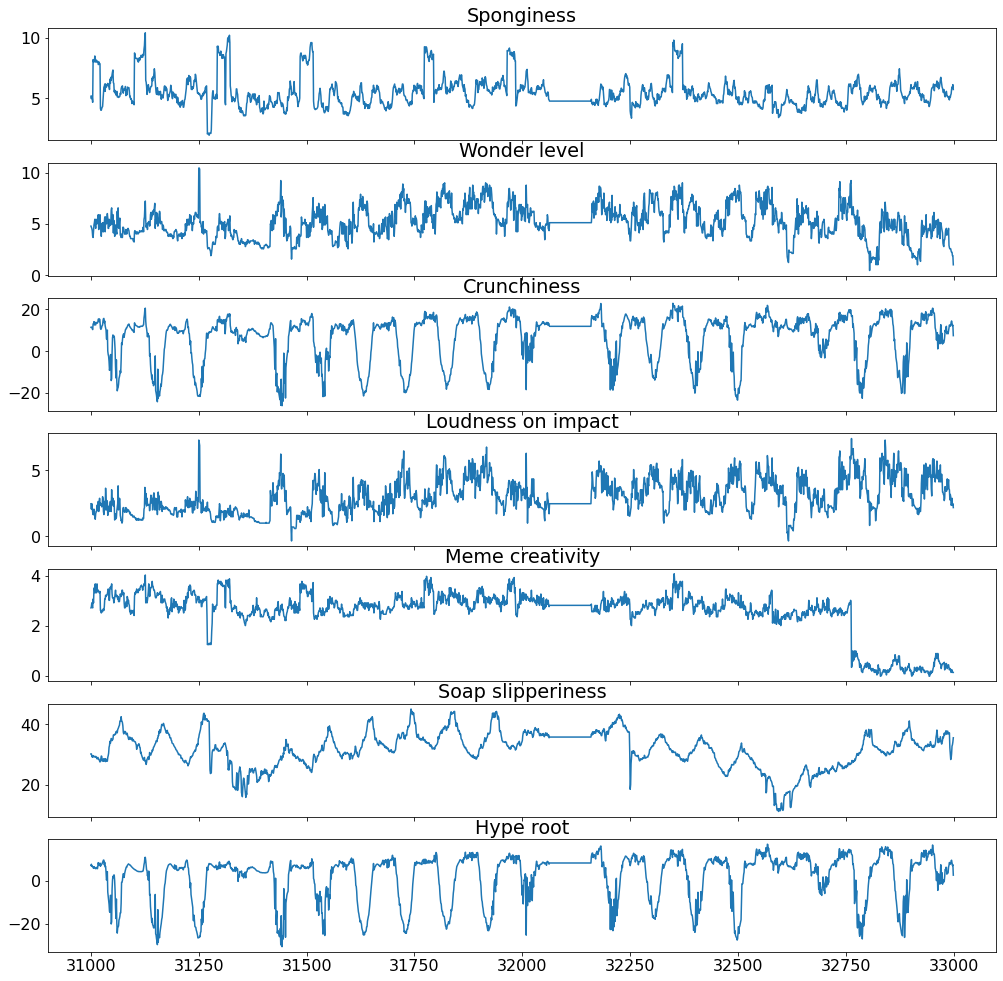

In [ ]:
inspect_dataframe(dataset[31000:33000], dataset.columns)

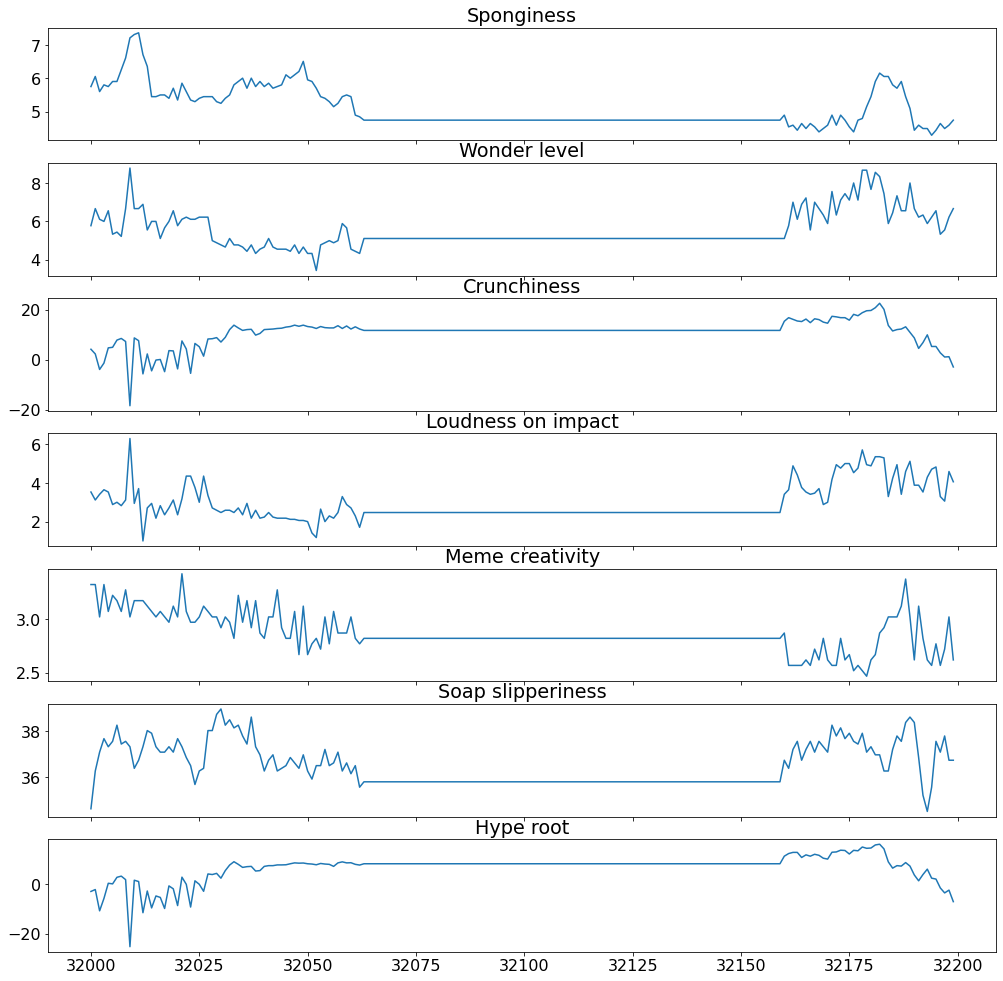

,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
32075,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32076,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32077,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32078,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32079,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32080,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32081,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32082,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32083,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396
32084,4.74164,5.11348,11.78502,2.47408,2.82102,35.798579,8.31396


In [ ]:
#We notice that there are certain points were most of the dataset seems constant
#For example:
inspect_dataframe(dataset[32000:32200], dataset.columns)
dataset[32075:32100]

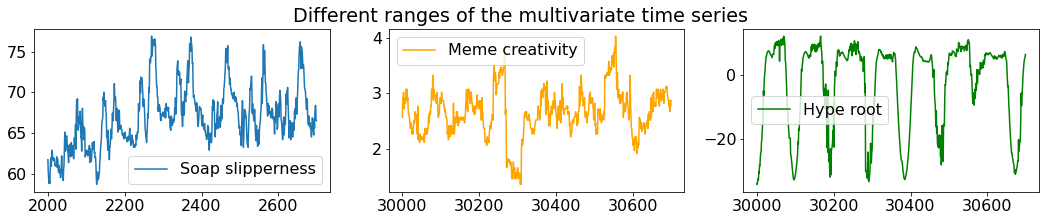

In [ ]:
# Different ranges --> that's why we need minmax scaler

fig, (ax1, ax2,ax3 ) = plt.subplots(1, 3,figsize=(18,3))
fig.suptitle('Different ranges of the multivariate time series')
ax1.plot(dataset.iloc[2000:2700,5],label='Soap slipperness' );
ax2.plot(dataset.iloc[30000:30700,4],label='Meme creativity', c="orange" )
ax3.plot(dataset.iloc[30000:30700,6],label='Hype root', c="green"  )
ax1.legend()
ax2.legend()
ax3.legend()


**Training_Validation - Test** (0.90/0.10) split + **Normalization** (MinMax scaler)



68528
6852
(61676, 7) (6852, 7)


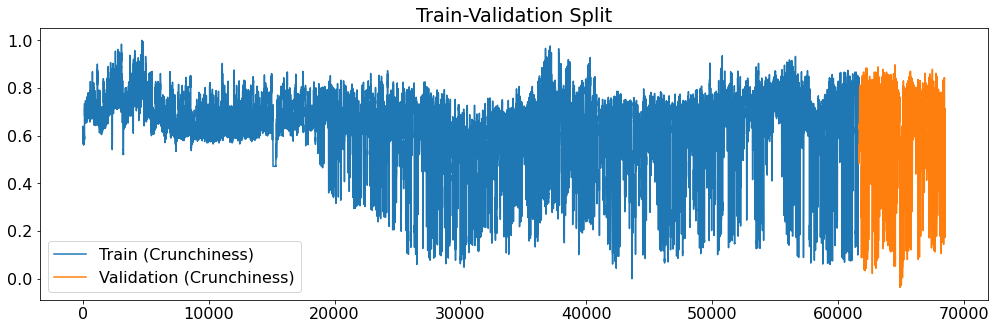

In [ ]:
#  We split the given dataset in TRAINING and VALIDATION. Important: Data have not been shuffled before splitting. This is for two reasons:
# 1. It ensures that chopping the data into windows of consecutive samples is still possible.
# 2. It ensures that the training/validation results are more realistic, being evaluated on the data collected after the model was trained.

#Split
dataset_len = len(dataset)
print(dataset_len)
split=0.10
test_size=int(dataset_len*split) # validation set size
print(test_size)
X_train_raw = dataset.iloc[:-test_size]
X_test_raw = dataset.iloc[-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

#Maximum and minimum
X_min = X_train_raw.min()
X_max = X_train_raw.max()

#MinMax scaler
X_train_raw = (X_train_raw-X_min)/(X_max-X_min)
X_test_raw = (X_test_raw-X_min)/(X_max-X_min)

# Plot of Training and Validation split with normalized data
plt.figure(figsize=(17,5))
plt.plot(X_train_raw.Crunchiness, label='Train (Crunchiness)')
plt.plot(X_test_raw.Crunchiness, label='Validation (Crunchiness)')
plt.title('Train-Validation Split')
plt.legend()
plt.show()





Statistical Analysis: Feature extraction

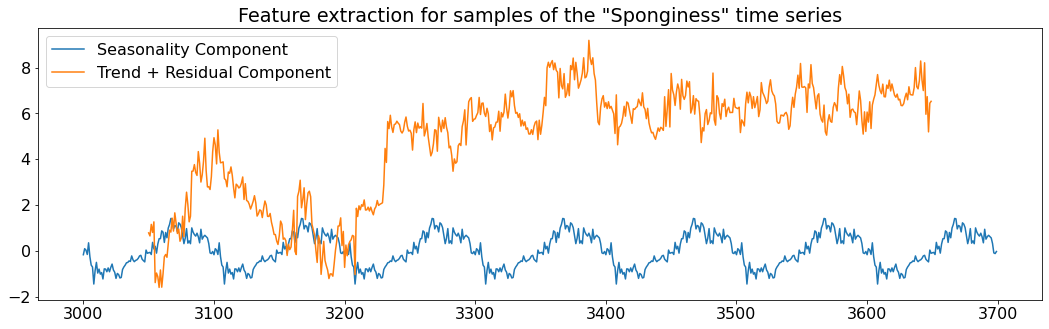

In [ ]:
# Common approach in machine learning: not see the problem only as a 'black box model', but use a 'gray box' approach, extracting some features to improve model identification

from statsmodels.tsa.seasonal import seasonal_decompose

column=3 #column of the dataframe, in this case sponginess

result=seasonal_decompose(dataset.iloc[3000:3700,column], model='additive', freq=100)

plt.figure(figsize=(18,5))
plt.plot(result.seasonal,label='Seasonality Component' )
plt.plot(result.trend+result.resid,label='Trend + Residual Component' )
plt.title('Feature extraction for samples of the "Sponginess" time series')
plt.legend()
